<a href="https://colab.research.google.com/github/nhjung-phd/Papers/blob/main/factor2025/factor_rl_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# BTC-USD 시세 조회 (Ticker API)
url = "https://api.blockchain.com/v3/exchange/tickers/BTC-USD"
response = requests.get(url)

# 응답 결과를 DataFrame으로 변환
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame([data])
    print(df)
else:
    print("API 요청 실패:", response.status_code)


    symbol  price_24h  volume_24h  last_trade_price
0  BTC-USD   104300.0    0.383483          103000.0


In [ ]:
import yfinance as yf

btc = yf.download('BTC-USD', start='2014-01-01', end='2024-12-31')
print(btc.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [ ]:
# Colab에서는 설치 필요
!pip install yfinance

import yfinance as yf
import pandas as pd

# 1. BTC 가격 데이터 다운로드
btc = yf.download("BTC-USD", start="2014-01-01", end="2024-12-31")

# 2. 팩터 계산
btc['Return'] = btc['Close'].pct_change()
btc['Volatility'] = btc['Close'].rolling(window=20).std()
btc['Volume_z'] = (btc['Volume'] - btc['Volume'].rolling(30).mean()) / btc['Volume'].rolling(30).std()

# ✅ 3. MA_deviation 안정적으로 계산
ma20_series = btc['Close'].rolling(window=20).mean()
btc['MA_deviation'] = (btc['Close'] - ma20_series) / ma20_series

# 4. 결측치 제거
btc.dropna(inplace=True)

# 결과 확인
btc.tail()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Return,Volatility,Volume_z,MA_deviation
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
Date,,,,,,,,,
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,-0.035284,3284.365678,-0.780298,-0.038130
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,-0.017022,3499.260316,-0.561424,-0.051762
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,0.010610,3585.266863,-1.488611,-0.038762
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,-0.017167,3776.246125,-1.237032,-0.053399
2024-12-30,92643.210938,94903.320312,91317.132812,93527.195312,56188003691,-0.009484,3997.177449,-0.377312,-0.060459


In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# 1️⃣ 분석 대상 자산 설정
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]

# 2️⃣ 가격 데이터 수집 (종가 기준)
price = yf.download(assets, start="2019-01-01", end="2024-12-31")['Close'].dropna()

# 3️⃣ 수익률 계산
returns = price.pct_change().dropna()

# 4️⃣ 20일 이동 평균 괴리율 (모멘텀/추세 팩터)
ma20 = price.rolling(window=20).mean()
ma_deviation = (price - ma20) / ma20

# 5️⃣ 20일 변동성 (리스크 팩터)
volatility = returns.rolling(window=20).std()

# 6️⃣ 거래량 z-score (유동성 팩터)
volume = yf.download(assets, start="2019-01-01", end="2024-12-31")['Volume'].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

# 7️⃣ 팩터 통합
factors = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_deviation.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna()

# 8️⃣ 확인
factors.tail()


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


Ticker,BNB-USD_Ret,BTC-USD_Ret,ETH-USD_Ret,SOL-USD_Ret,BNB-USD_Vol,BTC-USD_Vol,ETH-USD_Vol,SOL-USD_Vol,BNB-USD_Dev,BTC-USD_Dev,ETH-USD_Dev,SOL-USD_Dev,BNB-USD_VolZ,BTC-USD_VolZ,ETH-USD_VolZ,SOL-USD_VolZ
Date,,,,,,,,,,,,,,,,
2024-12-26,-0.019887,-0.035284,-0.046378,-0.046896,0.031521,0.025879,0.034909,0.040717,-0.016700,-0.038130,-0.094000,-0.103111,-1.273588,-0.780298,-1.160704,-1.230230
2024-12-27,0.003006,-0.017022,-0.000693,-0.023322,0.030887,0.026096,0.034910,0.040606,-0.009510,-0.051762,-0.086256,-0.112457,-0.583124,-0.561424,-0.967990,-1.193866
2024-12-28,0.044218,0.010610,0.020723,0.060845,0.032645,0.026021,0.035472,0.043771,0.035947,-0.038762,-0.059474,-0.048889,-0.549132,-1.488611,-1.550136,-1.415227
2024-12-29,-0.037734,-0.017167,-0.014241,-0.027020,0.029493,0.024963,0.032186,0.040564,-0.003417,-0.053399,-0.068107,-0.068318,-0.781691,-1.237032,-1.521618,-1.343012
2024-12-30,0.014979,-0.009484,0.002054,0.006766,0.029287,0.024988,0.031912,0.040585,0.009541,-0.060459,-0.062601,-0.056735,-0.612352,-0.377312,-0.625723,-0.858728


In [ ]:
# 📌 필요한 패키지 설치 (Colab에서 실행 시)
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# 1️⃣ 자산 설정 및 데이터 수집
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
price = yf.download(assets, start="2019-01-01", end="2024-12-31")['Close'].dropna()
returns = price.pct_change().dropna()

# 2️⃣ 팩터 계산
volatility = returns.rolling(window=20).std()
ma20 = price.rolling(window=20).mean()
ma_deviation = (price - ma20) / ma20
volume = yf.download(assets, start="2019-01-01", end="2024-12-31")['Volume'].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

# 3️⃣ 팩터 통합
factor_df = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_deviation.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna()

# 4️⃣ 월간 수익률 계산 (Sharpe/Sortino 최적화용)
monthly_returns = returns.resample('M').sum().dropna()

# 5️⃣ Sharpe 비율 최적화 함수
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(port_return - risk_free_rate) / port_volatility  # minimize

# 6️⃣ Sortino 비율 최적화 함수
def sortino_ratio(weights, mean_returns, returns, target=0.0):
    port_return = np.dot(weights, mean_returns)
    downside_risk = np.sqrt(np.mean(np.minimum(returns @ weights - target, 0) ** 2))
    return -(port_return - target) / downside_risk

# 7️⃣ 최적화 세팅
mean_returns = monthly_returns.mean()
cov_matrix = monthly_returns.cov()
n_assets = len(mean_returns)
init_guess = [1/n_assets] * n_assets
bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 8️⃣ Sharpe 비율 기준 최적화
opt_sharpe = minimize(sharpe_ratio, init_guess, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# 9️⃣ Sortino 비율 기준 최적화
opt_sortino = minimize(sortino_ratio, init_guess, args=(mean_returns, monthly_returns),
                       method='SLSQP', bounds=bounds, constraints=constraints)

# 🔟 결과 출력
weights_df = pd.DataFrame({
    "Asset": mean_returns.index,
    "Sharpe_Opt_Weight": opt_sharpe.x,
    "Sortino_Opt_Weight": opt_sortino.x
})

print("📊 최적화된 포트폴리오 가중치")
print(weights_df)


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
<ipython-input-18-99984c219776>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').sum().dropna()


📊 최적화된 포트폴리오 가중치
     Asset  Sharpe_Opt_Weight  Sortino_Opt_Weight
0  BNB-USD           0.168712        7.530582e-01
1  BTC-USD           0.352239        6.938894e-17
2  ETH-USD           0.278200        0.000000e+00
3  SOL-USD           0.200849        2.469418e-01


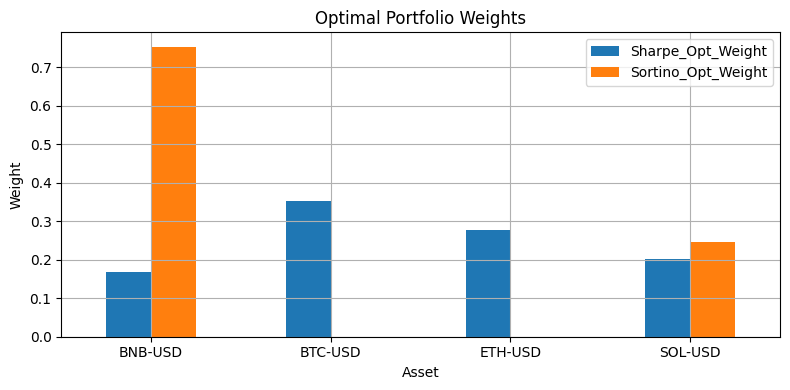

In [ ]:
import matplotlib.pyplot as plt

weights_df.set_index("Asset").plot.bar(figsize=(8,4), title="Optimal Portfolio Weights")
plt.ylabel("Weight")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 강화학습 기반 동적 자산배분: PPO + Sharpe 최적화 환경
# 사전 설치 필요: !pip install yfinance stable-baselines3

import gym
import numpy as np
import pandas as pd
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# 📌 1. 환경 클래스 정의
class PortfolioEnv(gym.Env):
    def __init__(self, returns, factors, window_size=30):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window_size = window_size
        self.max_step = len(factors) - window_size
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(window_size, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.step_count = 0
        self.weights = np.array([1/self.n_assets] * self.n_assets)
        self.portfolio_returns = []
        self.current_idx = self.window_size
        return self._get_observation()

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / np.sum(action + 1e-8)
        r_t = self.returns.iloc[self.current_idx].values
        port_return = np.dot(action, r_t)
        self.portfolio_returns.append(port_return)

        reward = self._sharpe_reward()
        self.weights = action
        self.step_count += 1
        self.current_idx += 1

        done = self.step_count >= self.max_step
        obs = self._get_observation()
        info = {"portfolio_return": port_return}
        return obs, reward, done, info

    def _get_observation(self):
        return self.factors.iloc[self.current_idx - self.window_size:self.current_idx].values

    def _sharpe_reward(self):
        if len(self.portfolio_returns) < 2:
            return 0
        r = np.array(self.portfolio_returns[-30:])
        return (np.mean(r)) / (np.std(r) + 1e-6)

# 📌 2. 데이터 준비 (예: BTC, ETH, BNB, SOL)
import yfinance as yf
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
price = yf.download(assets, start="2019-01-01", end="2024-12-31")["Close"].dropna()
returns = price.pct_change().dropna()

volatility = returns.rolling(20).std()
ma = price.rolling(20).mean()
ma_dev = (price - ma) / ma
volume = yf.download(assets, start="2019-01-01", end="2024-12-31")["Volume"].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

factor_df = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_dev.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna()

# 📌 3. 환경 초기화
env = DummyVecEnv([lambda: PortfolioEnv(returns=returns, factors=factor_df)])

# 📌 4. PPO 에이전트 훈련
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# 📌 5. 결과 테스트
obs = env.reset()
for _ in range(10):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    print(f"Reward: {rewards[0]:.5f}, Portfolio Return: {info[0]['portfolio_return']:.5f}")

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 932  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 685         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014439669 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.65       |
|    explained_variance   | 0.0651      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.657       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0289     |
|    std                  | 0.988       |
|    value_loss           | 2.85        |
-----------------

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 627  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 549         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016002577 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | -0.0326     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.722       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0315     |
|    std                  | 0.997       |
|    value_loss           | 2.4         |
-----------------

TypeError: no numeric data to plot

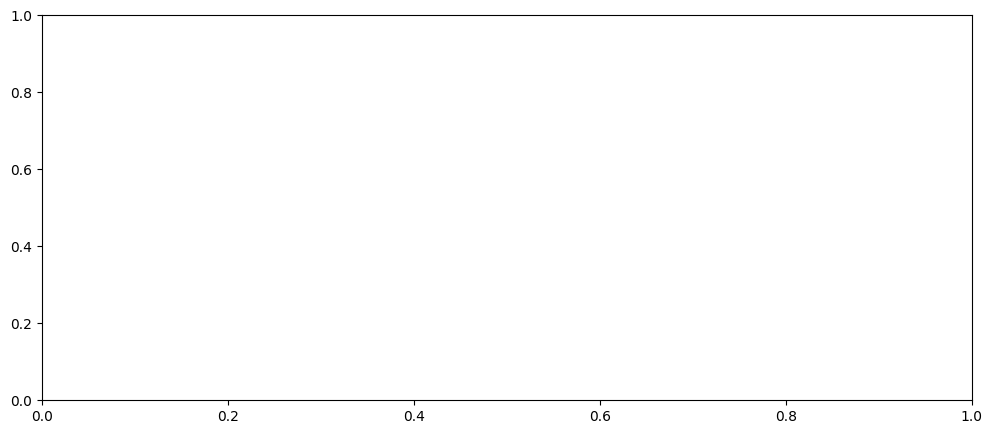

In [ ]:
# 강화학습 기반 동적 자산배분 (실제 리밸런싱 및 매수/매도 반영 + 날짜 기준 그래프)
# 사전 설치 필요: !pip install yfinance stable-baselines3

import gym
import numpy as np
import pandas as pd
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

# 📌 1. 환경 클래스 정의
class PortfolioEnv(gym.Env):
    def __init__(self, returns, prices, factors, window_size=30, fee=0.001):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.prices = prices
        self.factors = factors
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window_size = window_size
        self.max_step = len(factors) - window_size - 1
        self.fee = fee

        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(window_size, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.step_count = 0
        self.current_idx = self.window_size
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.dates = []
        return self._get_observation()

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.prices.iloc[self.current_idx].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        cost = np.sum(np.abs(trade_value) * self.fee)
        self.cash -= cost

        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.prices.iloc[self.current_idx + 1].values
        portfolio_value_now = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (portfolio_value_now - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(portfolio_value_now)
        self.dates.append(self.prices.index[self.current_idx + 1])

        self.current_idx += 1
        self.step_count += 1
        done = self.step_count >= self.max_step or self.current_idx + 1 >= len(self.prices)

        obs = self._get_observation()
        reward = self._sharpe_reward()
        info = {"portfolio_return": port_return, "portfolio_value": portfolio_value_now, "cost": cost}
        return obs, reward, done, info

    def _get_observation(self):
        return self.factors.iloc[self.current_idx - self.window_size:self.current_idx].values

    def _sharpe_reward(self):
        if len(self.portfolio_returns) < 2:
            return 0
        r = np.array(self.portfolio_returns[-30:])
        return np.mean(r) / (np.std(r) + 1e-6)

# 📌 2. 데이터 준비
import yfinance as yf
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
data = yf.download(assets, start="2019-01-01", end="2024-12-31")
price = data["Close"].dropna()
returns = price.pct_change().dropna()

volatility = returns.rolling(20).std()
ma = price.rolling(20).mean()
ma_dev = (price - ma) / ma
volume = data["Volume"].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

factor_df = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_dev.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna()

# 📌 3. 환경 초기화
env_instance = PortfolioEnv(returns=returns, prices=price, factors=factor_df)
env = DummyVecEnv([lambda: env_instance])

# 📌 4. PPO 에이전트 훈련
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# 📌 5. 결과 테스트 및 날짜 기준 수익률 시각화
obs = env.reset()
for _ in range(env_instance.max_step):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    if dones[0]:
        break

# 날짜와 매핑된 포트폴리오 수익률 시각화
min_len = min(len(env_instance.portfolio_value) - 1, len(env_instance.dates))
portfolio_series = pd.Series(env_instance.portfolio_value[1:1+min_len], index=env_instance.dates[:min_len])

plt.figure(figsize=(12, 5))
portfolio_series.plot(label="Portfolio Value")
plt.title("Cumulative Portfolio Value by Date")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 688  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014956536 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 0.0386      |
|    learning_rate        | 0.0003      |
|    loss                 | 8.7         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.024      |
|    std                  | 0.995       |
|    value_loss           | 4.36        |
-----------------

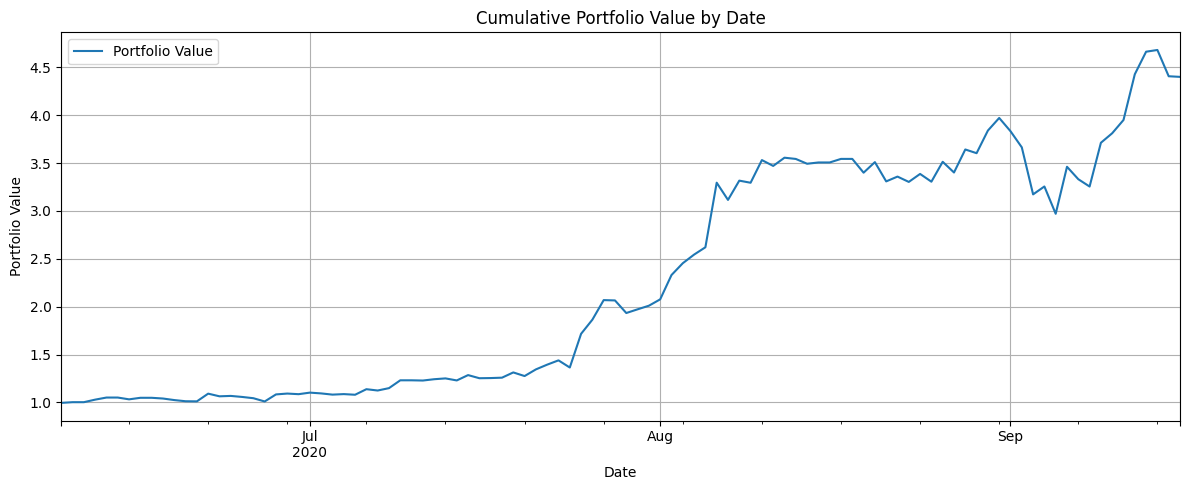

In [ ]:
# 강화학습 기반 동적 자산배분 (실제 리밸런싱 및 매수/매도 반영 + 날짜 기준 그래프)
# 사전 설치 필요: !pip install yfinance stable-baselines3

import gym
import numpy as np
import pandas as pd
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

# 📌 1. 환경 클래스 정의
class PortfolioEnv(gym.Env):
    def __init__(self, returns, prices, factors, window_size=30, fee=0.001):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.prices = prices
        self.factors = factors
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window_size = window_size
        self.max_step = len(factors) - window_size - 1
        self.fee = fee

        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(window_size, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.step_count = 0
        self.current_idx = self.window_size
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.dates = []
        # Ensure we can take at least one step after reset
        if self.current_idx >= len(self.prices) - 1:
             raise ValueError("Not enough data for initial window and at least one step.")

        return self._get_observation()

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.prices.iloc[self.current_idx].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        cost = np.sum(np.abs(trade_value) * self.fee)
        self.cash -= cost

        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        # Check if there is a next step available before accessing prices.iloc[self.current_idx + 1]
        if self.current_idx + 1 >= len(self.prices):
             done = True
             obs = self._get_observation() # Return current state or handle end of episode
             reward = self._sharpe_reward()
             # Use the last calculated portfolio value if no next price is available
             info = {"portfolio_return": 0.0, "portfolio_value": self.portfolio_value[-1], "cost": cost}
             return obs, reward, done, info


        price_next = self.prices.iloc[self.current_idx + 1].values
        portfolio_value_now = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (portfolio_value_now - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(portfolio_value_now)
        self.dates.append(self.prices.index[self.current_idx + 1])

        self.current_idx += 1
        self.step_count += 1
        # The condition for done should only check against max_step if current_idx + 1 is still within bounds
        done = self.step_count >= self.max_step

        obs = self._get_observation()
        reward = self._sharpe_reward()
        info = {"portfolio_return": port_return, "portfolio_value": portfolio_value_now, "cost": cost}
        return obs, reward, done, info


    def _get_observation(self):
        # Ensure there's enough data for the observation window
        start_idx = self.current_idx - self.window_size
        if start_idx < 0 or self.current_idx > len(self.factors):
             # This should ideally not happen with proper reset logic, but adding a safeguard
             print(f"Warning: Observation window out of bounds. Start: {start_idx}, Current: {self.current_idx}, Factors len: {len(self.factors)}")
             # Return a placeholder observation or handle error
             # For simplicity, returning the available window or zeros
             if start_idx < 0: start_idx = 0
             if self.current_idx > len(self.factors): self.current_idx = len(self.factors)
             return self.factors.iloc[start_idx:self.current_idx].values
        return self.factors.iloc[start_idx:self.current_idx].values


    def _sharpe_reward(self):
        if len(self.portfolio_returns) < 2:
            return 0
        r = np.array(self.portfolio_returns[-30:])
        # Avoid division by zero if std is zero
        std_dev = np.std(r)
        return np.mean(r) / (std_dev + 1e-6)

# 📌 2. 데이터 준비
import yfinance as yf
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
data = yf.download(assets, start="2019-01-01", end="2024-12-31")
price = data["Close"].dropna()
returns = price.pct_change().dropna()

volatility = returns.rolling(20).std()
ma = price.rolling(20).mean()
ma_dev = (price - ma) / ma
volume = data["Volume"].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

# Ensure all factor dataframes have the same index before concatenating
# This step is crucial if dropna() resulted in different indices
common_index = returns.index.intersection(volatility.index).intersection(ma_dev.index).intersection(volume_z.index)

returns = returns.loc[common_index]
volatility = volatility.loc[common_index]
ma_dev = ma_dev.loc[common_index]
volume_z = volume_z.loc[common_index]
price_aligned = price.loc[common_index] # Also align price data

factor_df = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_dev.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna() # Dropna again just in case concat introduced NaNs


# 📌 3. 환경 초기화
# Pass the aligned price data to the environment
env_instance = PortfolioEnv(returns=returns.loc[factor_df.index], prices=price_aligned.loc[factor_df.index], factors=factor_df)
env = DummyVecEnv([lambda: env_instance])

# 📌 4. PPO 에이gent 훈련
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# 📌 5. 결과 테스트 및 날짜 기준 수익률 시각화
obs = env.reset()
# Run the testing loop for a sufficient number of steps, but not exceeding max_step
# Let's run for at most 100 steps for a quick test, or use env_instance.max_step for full test
test_steps = min(env_instance.max_step, 100) # Limit testing steps for faster visualization
for _ in range(test_steps):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    # The dones flag should propagate correctly from the environment's step method
    if dones[0]:
        print("Episode finished during testing.")
        break # Break the testing loop if the environment signals done


# 날짜와 매핑된 포트폴리오 수익률 시각화
# Use the accumulated portfolio_value and dates directly from the environment instance
# Ensure there's data to plot
if len(env_instance.portfolio_value) > 1 and len(env_instance.dates) > 0:
    # The portfolio_value list includes the initial value at index 0.
    # Dates and subsequent portfolio values start from index 1.
    # Ensure lists are aligned and have data before creating series
    plot_values = env_instance.portfolio_value[1:]
    plot_dates = env_instance.dates

    # Ensure plot_values and plot_dates have the same length
    min_plot_len = min(len(plot_values), len(plot_dates))
    portfolio_series = pd.Series(plot_values[:min_plot_len], index=plot_dates[:min_plot_len])

    if not portfolio_series.empty:
        plt.figure(figsize=(12, 5))
        portfolio_series.plot(label="Portfolio Value")
        plt.title("Cumulative Portfolio Value by Date")
        plt.xlabel("Date")
        plt.ylabel("Portfolio Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Portfolio series is empty, cannot plot.")
else:
    print("Not enough data collected during testing to plot the portfolio value.")

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 789  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 617         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016506677 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.66       |
|    explained_variance   | -0.0114     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.07        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0308     |
|    std                  | 0.992       |
|    value_loss           | 3.72        |
-----------------

<ipython-input-33-4961b1f16891>:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-33-4961b1f16891>:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1



📊 Performance Comparison
Cumulative Return         PPO: 0.9116    BTC: 0.1204
Annualized Return         PPO: 4.1180    BTC: 0.3317
Annualized Volatility     PPO: 0.9497    BTC: 0.3814
Sharpe Ratio              PPO: 4.3361    BTC: 0.8697
Max Drawdown              PPO: -0.2878    BTC: -0.1732


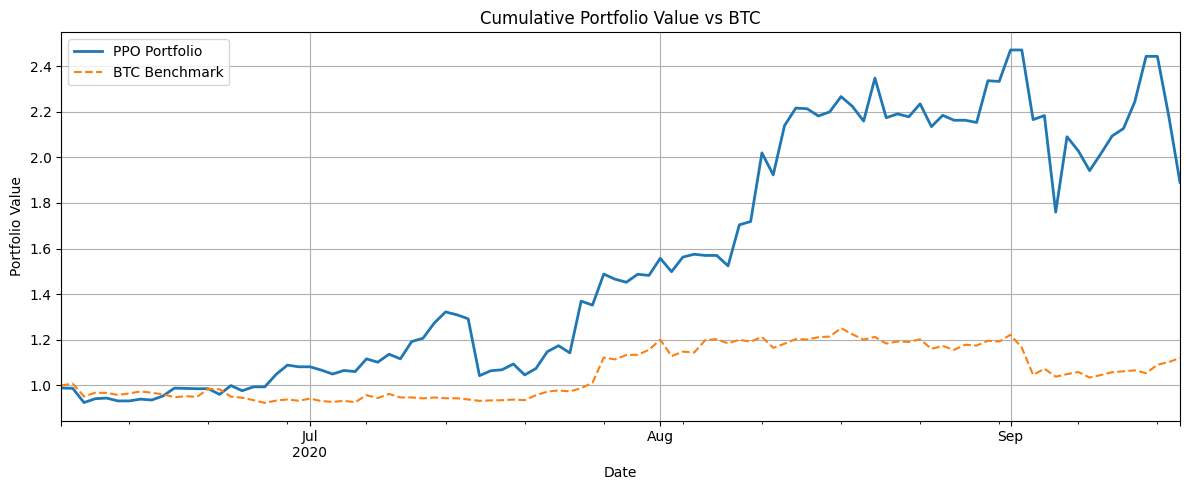

In [ ]:
# 강화학습 기반 동적 자산배분 (벤치마크 비교 및 성과지표 추가)
# 사전 설치 필요: !pip install yfinance stable-baselines3

import gym
import numpy as np
import pandas as pd
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

# 📌 1. 환경 클래스 정의 (변경 없음, 생략)
# ... (생략: PortfolioEnv 클래스 정의는 이전과 동일하게 유지)

# 📌 2. 데이터 준비
import yfinance as yf
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
data = yf.download(assets, start="2019-01-01", end="2024-12-31")
price = data["Close"].dropna()
returns = price.pct_change().dropna()

volatility = returns.rolling(20).std()
ma = price.rolling(20).mean()
ma_dev = (price - ma) / ma
volume = data["Volume"].dropna()
volume_z = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()

common_index = returns.index.intersection(volatility.index).intersection(ma_dev.index).intersection(volume_z.index)
returns = returns.loc[common_index]
volatility = volatility.loc[common_index]
ma_dev = ma_dev.loc[common_index]
volume_z = volume_z.loc[common_index]
price_aligned = price.loc[common_index]

factor_df = pd.concat([
    returns.add_suffix("_Ret"),
    volatility.add_suffix("_Vol"),
    ma_dev.add_suffix("_Dev"),
    volume_z.add_suffix("_VolZ")
], axis=1).dropna()

# 📌 3. 환경 초기화
env_instance = PortfolioEnv(returns=returns.loc[factor_df.index], prices=price_aligned.loc[factor_df.index], factors=factor_df)
env = DummyVecEnv([lambda: env_instance])

# 📌 4. PPO 에이전트 훈련
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# 📌 5. 테스트 실행 및 수익률 기록
obs = env.reset()
test_steps = min(env_instance.max_step, 100)
for _ in range(test_steps):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    if dones[0]:
        print("Episode finished during testing.")
        break

# ✅ 누적 수익률 계산 (PPO)
plot_values = env_instance.portfolio_value[1:]
plot_dates = env_instance.dates
min_plot_len = min(len(plot_values), len(plot_dates))
ppo_series = pd.Series(plot_values[:min_plot_len], index=plot_dates[:min_plot_len])

# ✅ 벤치마크: BTC 단독 투자
btc_price = price_aligned["BTC-USD"].loc[ppo_series.index]
btc_returns = btc_price.pct_change().fillna(0)
btc_cumulative = (1 + btc_returns).cumprod()

# ✅ 성과 지표 계산 함수 정의
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

ppo_perf = performance_metrics(ppo_series)
btc_perf = performance_metrics(btc_cumulative)

# ✅ 성과 지표 출력
print("\n📊 Performance Comparison")
for metric in ppo_perf:
    print(f"{metric:<25} PPO: {ppo_perf[metric]:.4f}    BTC: {btc_perf[metric]:.4f}")

# ✅ 시각화
plt.figure(figsize=(12, 5))
ppo_series.plot(label="PPO Portfolio", linewidth=2)
btc_cumulative.plot(label="BTC Benchmark", linestyle="--")
plt.title("Cumulative Portfolio Value vs BTC")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(



📊 Performance Comparison

Sharpe Portfolio
Cumulative Return        : 4.8082
Annualized Return        : 0.3030
Annualized Volatility    : 0.6869
Sharpe Ratio             : 0.4411
Max Drawdown             : -0.9273

Beta Portfolio
Cumulative Return        : 28.0357
Annualized Return        : 0.6599
Annualized Volatility    : 0.7074
Sharpe Ratio             : 0.9330
Max Drawdown             : -0.8936

BTC Portfolio
Cumulative Return        : 8.7921
Annualized Return        : 0.4095
Annualized Volatility    : 0.5056
Sharpe Ratio             : 0.8100
Max Drawdown             : -0.7663


<ipython-input-38-2ed4d326ee73>:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-38-2ed4d326ee73>:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1


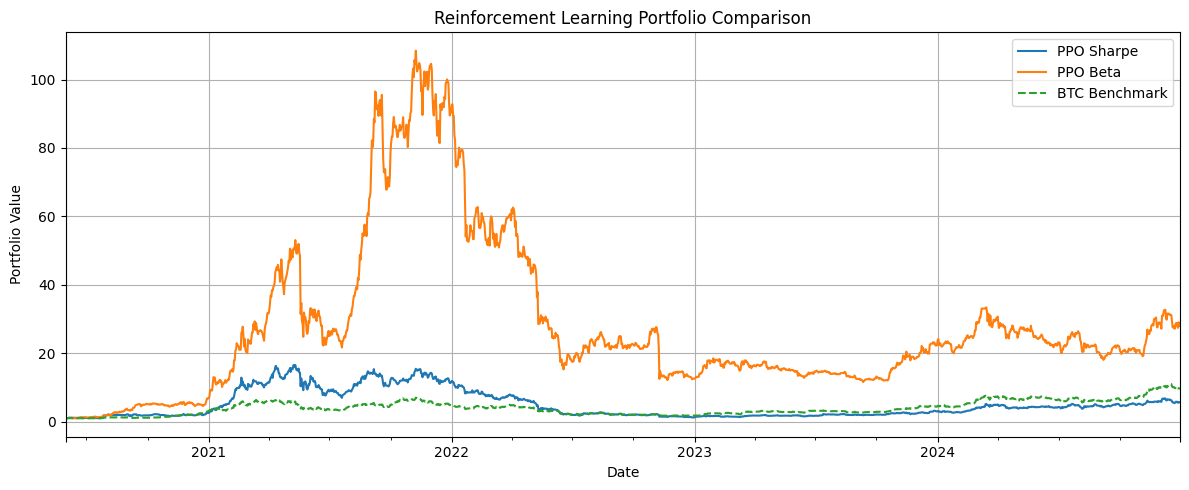

In [ ]:
# 강화학습 기반 자산배분 비교: Sharpe 최대화 vs Beta 가중합 최대화 vs BTC 단독 투자
# PPO 기반 리밸런싱 전략 구현 포함

import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import random
import torch

seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
env.seed(seed)

# 📌 1. 데이터 수집
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
data = yf.download(assets, start="2019-01-01", end="2024-12-31")
price = data["Close"].dropna()
returns = price.pct_change().dropna()

# 📌 2. 팩터 정의
momentum = price.pct_change(20)
volatility = returns.rolling(20).std()

# 팩터 입력 데이터 정리
factor_data = pd.concat([
    momentum.add_suffix("_mom"),
    volatility.add_suffix("_vol")
], axis=1).dropna()

common_index = returns.index.intersection(factor_data.index)
returns = returns.loc[common_index]
price = price.loc[common_index]
factor_data = factor_data.loc[common_index]

# 📌 3. PPO 환경 정의 (Sharpe 또는 Beta 기준)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            # 베타는 모멘텀 팩터에 대한 민감도 누적치를 최대화
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 📌 4. PPO 훈련 함수
def train_ppo_env(objective):
    env_fn = lambda: PPOPortfolioEnv(returns, factor_data, price, objective=objective)
    env = DummyVecEnv([env_fn])
    model = PPO("MlpPolicy", env, verbose=0)
    model.learn(total_timesteps=20000)
    return model, env_fn

# 📌 5. 실행 및 시뮬레이션
def evaluate_model(model, env_fn):
    env = env_fn()
    obs = env.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    return pd.Series(values, index=price.index[env.window+1:env.window+1+len(values)])

# PPO 훈련 및 평가
ppo_sharpe, env_sharpe = train_ppo_env("sharpe")
ppo_beta, env_beta = train_ppo_env("beta")

series_sharpe = evaluate_model(ppo_sharpe, env_sharpe)
series_beta = evaluate_model(ppo_beta, env_beta)
btc_returns = returns["BTC-USD"].loc[series_sharpe.index]
series_btc = (1 + btc_returns).cumprod()

# 📈 성과 지표 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 📊 성과 비교 출력
print("\n📊 Performance Comparison")
for name, series in zip(["Sharpe", "Beta", "BTC"], [series_sharpe, series_beta, series_btc]):
    perf = performance_metrics(series)
    print(f"\n{name} Portfolio")
    for k, v in perf.items():
        print(f"{k:<25}: {v:.4f}")

# 📊 시각화
plt.figure(figsize=(12, 5))
series_sharpe.plot(label="PPO Sharpe")
series_beta.plot(label="PPO Beta")
series_btc.plot(label="BTC Benchmark", linestyle="--")
plt.title("Reinforcement Learning Portfolio Comparison")
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install shimmy>=0.2.1

In [ ]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 776  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 528         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007700679 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 9.95e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.37        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0105     |
|    std                  | 0.997       |
|    value_loss           | 1.57e+06    |
-----------------

<ipython-input-5-7f43d870f2bc>:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-5-7f43d870f2bc>:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1


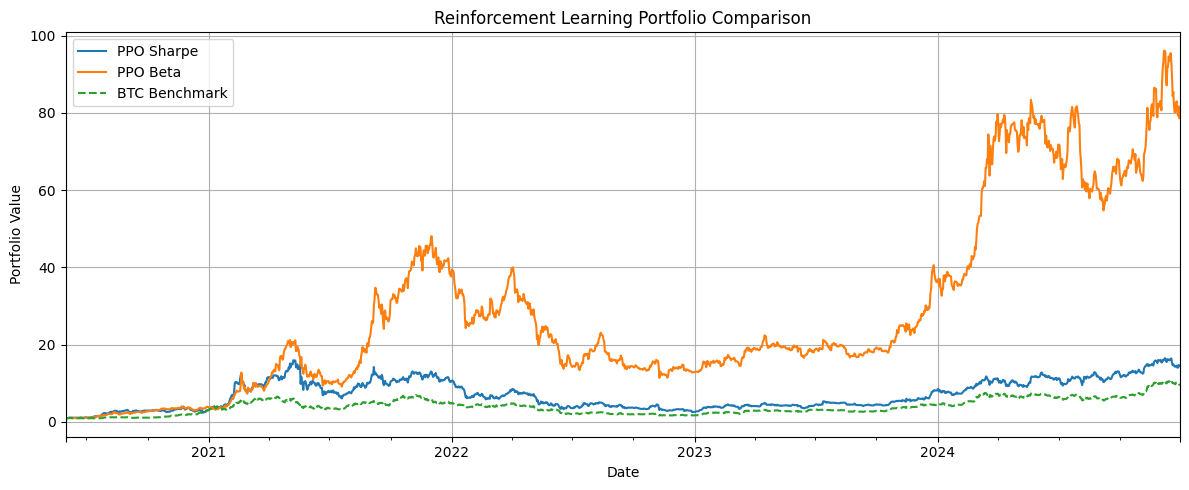

In [ ]:
# 강화학습 기반 자산배분 비교: Sharpe 최대화 vs Beta 가중합 최대화 vs BTC 단독 투자
# PPO 기반 리밸런싱 전략 구현 포함

import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)


# 📌 1. 데이터 수집
assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
data = yf.download(assets, start="2019-01-01", end="2024-12-31")
price = data["Close"].dropna()
returns = price.pct_change().dropna()

# 📌 2. 팩터 정의
momentum = price.pct_change(20)
volatility = returns.rolling(20).std()

# 팩터 입력 데이터 정리
factor_data = pd.concat([
    momentum.add_suffix("_mom"),
    volatility.add_suffix("_vol")
], axis=1).dropna()

common_index = returns.index.intersection(factor_data.index)
returns = returns.loc[common_index]
price = price.loc[common_index]
factor_data = factor_data.loc[common_index]

# 📌 3. PPO 환경 정의 (Sharpe 또는 Beta 기준)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 📌 4. PPO 훈련 함수
def train_ppo_env(objective):
    env_fn = lambda: PPOPortfolioEnv(returns, factor_data, price, objective=objective)
    env = DummyVecEnv([env_fn])
    model = PPO("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=30000)
    return model, env_fn

# 📌 5. 실행 및 시뮬레이션
def evaluate_model(model, env_fn):
    env = env_fn()
    obs = env.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    return pd.Series(values, index=price.index[env.window+1:env.window+1+len(values)])

# PPO 훈련 및 평가
ppo_sharpe, env_sharpe = train_ppo_env("sharpe")
ppo_beta, env_beta = train_ppo_env("beta")

series_sharpe = evaluate_model(ppo_sharpe, env_sharpe)
series_beta = evaluate_model(ppo_beta, env_beta)
btc_returns = returns["BTC-USD"].loc[series_sharpe.index]
series_btc = (1 + btc_returns).cumprod()

# 📈 성과 지표 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 📊 성과 비교 출력
print("\n📊 Performance Comparison")
for name, series in zip(["Sharpe", "Beta", "BTC"], [series_sharpe, series_beta, series_btc]):
    perf = performance_metrics(series)
    print(f"\n{name} Portfolio")
    for k, v in perf.items():
        print(f"{k:<25}: {v:.4f}")

# 📊 시각화
plt.figure(figsize=(12, 5))
series_sharpe.plot(label="PPO Sharpe")
series_beta.plot(label="PPO Beta")
series_btc.plot(label="BTC Benchmark", linestyle="--")
plt.title("Reinforcement Learning Portfolio Comparison")
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%***********************]  4 of 4 completed


▶ Training Crypto Portfolio...
Using cpu device



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


-----------------------------
| time/              |      |
|    fps             | 574  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 497         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007700679 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 9.95e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.37        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0105     |
|    std                  | 0.997       |
|    value_loss           | 1.57e+06    |
----------------------------------

[*********************100%***********************]  4 of 4 completed


▶ Training Stock Portfolio...



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 735  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 553         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007284645 |
|    clip_fraction        | 0.0583      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 5.6e-06     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0102     |
|    std                  | 0.997       |
|    value_loss           | 1.35e+05    |
-----------------

[******************    38%                       ]  3 of 8 completed


▶ Training Mixed Portfolio...


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 544  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 480         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009853095 |
|    clip_fraction        | 0.082       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | -1.66e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 0.989       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0151     |
|    std                  | 0.999       |
|    value_loss           | 3.58e+05    |
-----------------

<ipython-input-14-652c5417f315>:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-14-652c5417f315>:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1


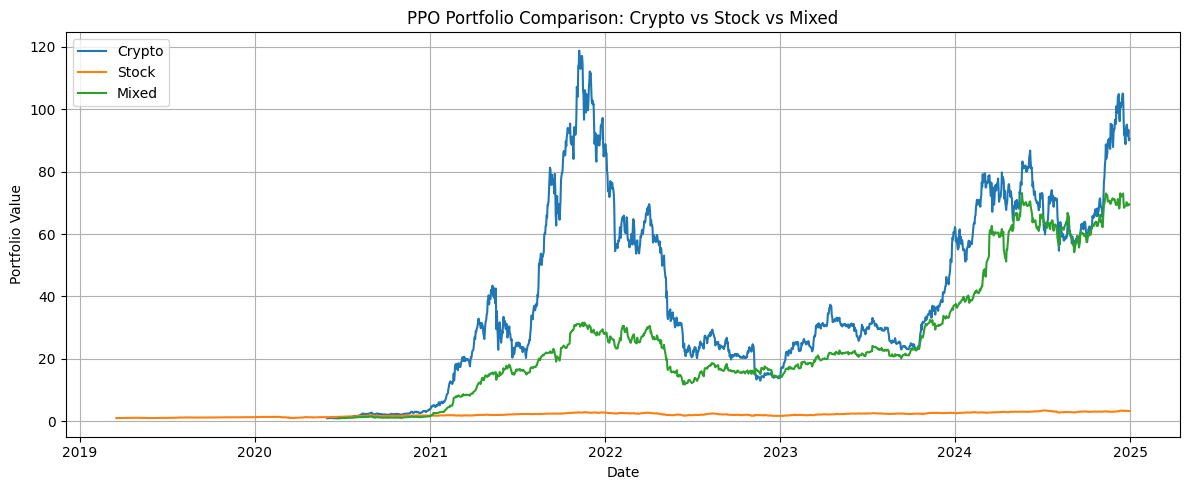

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 정의
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
mixed_assets = crypto_assets + stock_assets
asset_groups = {
    "Crypto": crypto_assets,
    "Stock": stock_assets,
    "Mixed": mixed_assets
}

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    common_index = returns.index.intersection(factors.index)
    return price.loc[common_index], returns.loc[common_index], factors.loc[common_index]

# PPO 환경 정의
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# PPO 훈련 및 평가 함수
def train_and_evaluate(asset_list, objective="sharpe"):
    price, returns, factors = fetch_data(asset_list)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective=objective)
    env = DummyVecEnv([make_env])
    model = PPO("MlpPolicy", env, verbose=1,seed=SEED)
    model.learn(total_timesteps=100000)

    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 지표 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실행 및 저장
results = {}
for name, assets in asset_groups.items():
    print(f"\n▶ Training {name} Portfolio...")
    results[name] = train_and_evaluate(assets, objective="sharpe")

# 📊 성과 비교 출력
print("\n📊 Performance Comparison")
for name, series in results.items():
    perf = performance_metrics(series)
    print(f"\n{name} Portfolio")
    for k, v in perf.items():
        print(f"{k:<25}: {v:.4f}")

# 📈 시각화
plt.figure(figsize=(12, 5))
for name, series in results.items():
    plt.plot(series, label=name)
plt.title("PPO Portfolio Comparison: Crypto vs Stock vs Mixed")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed


📌 Evaluating portfolios with objective: SHARPE
▶ Training Crypto Portfolio...
Using cpu device



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


-----------------------------
| time/              |      |
|    fps             | 645  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 524         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007700679 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 9.95e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.37        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0105     |
|    std                  | 0.997       |
|    value_loss           | 1.57e+06    |
----------------------------------

[*********************100%***********************]  4 of 4 completed

▶ Training Stock Portfolio...



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 778  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 572         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007284645 |
|    clip_fraction        | 0.0583      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 5.6e-06     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0102     |
|    std                  | 0.997       |
|    value_loss           | 1.35e+05    |
-----------------

[******************    38%                       ]  3 of 8 completed

▶ Training Mixed Portfolio...


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 527  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 417         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009853095 |
|    clip_fraction        | 0.082       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | -1.66e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 0.989       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0151     |
|    std                  | 0.999       |
|    value_loss           | 3.58e+05    |
-----------------

[*********************100%***********************]  4 of 4 completed


📌 Evaluating portfolios with objective: BETA
▶ Training Crypto Portfolio...
Using cpu device



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


-----------------------------
| time/              |      |
|    fps             | 465  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 361          |
|    iterations           | 2            |
|    time_elapsed         | 11           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0067740134 |
|    clip_fraction        | 0.0458       |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.66        |
|    explained_variance   | 0.00615      |
|    learning_rate        | 0.0003       |
|    loss                 | 1.49         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0117      |
|    std                  | 0.991        |
|    value_loss           | 6.01         |
----------------

[*********************100%***********************]  4 of 4 completed

▶ Training Stock Portfolio...
Using cpu device



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


-----------------------------
| time/              |      |
|    fps             | 422  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 379         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005726901 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 0.0354      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0756      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00897    |
|    std                  | 0.999       |
|    value_loss           | 0.236       |
----------------------------------

[************          25%                       ]  2 of 8 completed

▶ Training Mixed Portfolio...


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 448  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 354         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009700354 |
|    clip_fraction        | 0.0744      |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | -0.028      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.998       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0188     |
|    std                  | 0.997       |
|    value_loss           | 2.33        |
-----------------

<ipython-input-15-19307850b75d>:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-15-19307850b75d>:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1


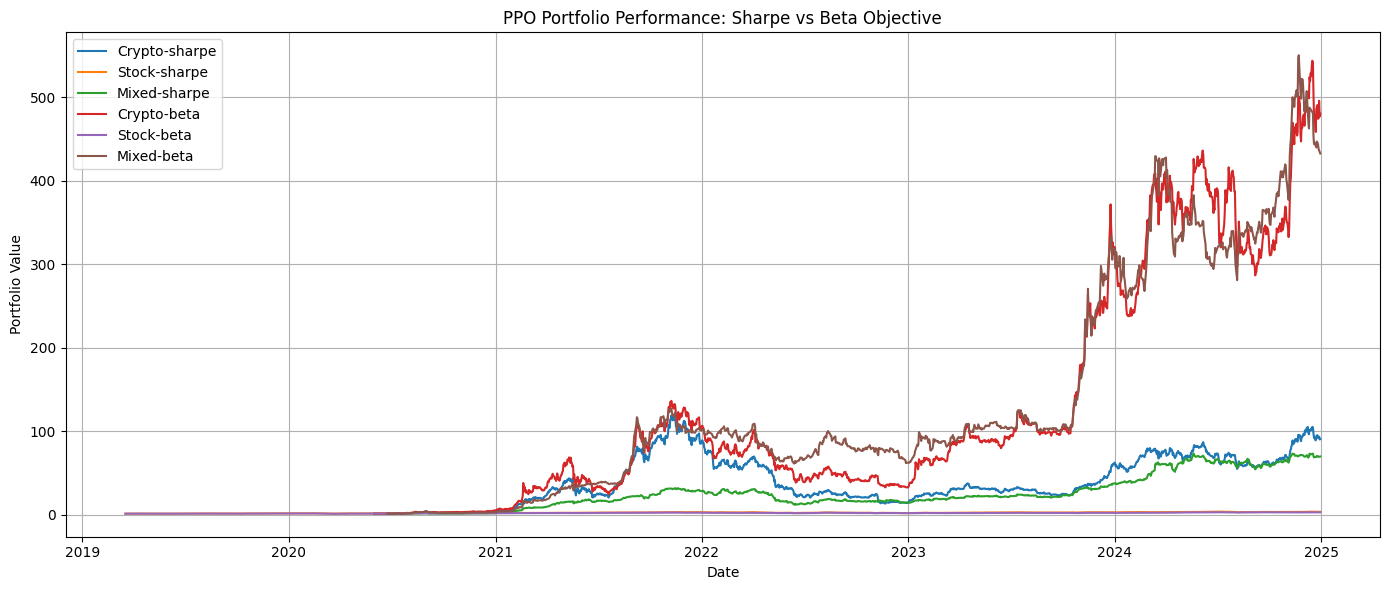

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 정의
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
mixed_assets = crypto_assets + stock_assets
asset_groups = {
    "Crypto": crypto_assets,
    "Stock": stock_assets,
    "Mixed": mixed_assets
}

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    common_index = returns.index.intersection(factors.index)
    return price.loc[common_index], returns.loc[common_index], factors.loc[common_index]

# PPO 환경 정의
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# PPO 훈련 및 평가 함수
def train_and_evaluate(asset_list, objective="sharpe"):
    price, returns, factors = fetch_data(asset_list)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective=objective)
    env = DummyVecEnv([make_env])
    model = PPO("MlpPolicy", env, verbose=1, seed=SEED)
    model.learn(total_timesteps=100000)

    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31 + len(values)]
    return pd.Series(values, index=index)

# 성과 지표 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실행 및 저장 (Sharpe & Beta 비교)
all_results = {"sharpe": {}, "beta": {}}
for obj in ["sharpe", "beta"]:
    print(f"\n📌 Evaluating portfolios with objective: {obj.upper()}")
    for name, assets in asset_groups.items():
        print(f"▶ Training {name} Portfolio...")
        all_results[obj][name] = train_and_evaluate(assets, objective=obj)

# 📊 성과 비교 출력
for obj in ["sharpe", "beta"]:
    print(f"\n==============================")
    print(f"🔍 Objective: {obj.upper()}")
    print(f"==============================")
    for name, series in all_results[obj].items():
        perf = performance_metrics(series)
        print(f"\n{name} Portfolio")
        for k, v in perf.items():
            print(f"{k:<25}: {v:.4f}")

# 📈 시각화
plt.figure(figsize=(14, 6))
for obj in ["sharpe", "beta"]:
    for name, series in all_results[obj].items():
        plt.plot(series, label=f"{name}-{obj}")
plt.title("PPO Portfolio Performance: Sharpe vs Beta Objective")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from itertools import product

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 정의
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
mixed_assets = crypto_assets + stock_assets
asset_groups = {
    "Crypto": crypto_assets,
    "Stock": stock_assets,
    "Mixed": mixed_assets
}

# 알고리즘 정의
algorithms = {
    "PPO": PPO,
    "SAC": SAC,
    "TD3": TD3
}

# 보상 함수 정의
objectives = ["sharpe", "beta"]

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    common_index = returns.index.intersection(factors.index)
    return price.loc[common_index], returns.loc[common_index], factors.loc[common_index]

# PPO 환경 정의
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수
def train_and_evaluate(asset_list, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(asset_list)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective=objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)
    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 지표 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 전체 실험 실행
results = {}
for (group_name, assets), (algo_name, algo_class), objective in product(asset_groups.items(), algorithms.items(), objectives):
    key = f"{group_name}_{algo_name}_{objective}"
    print(f"▶ Training {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)

# 성과 출력
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)


# 첫 번째 실험 (PPO + Crypto + Sharpe 보상)

In [1]:
!pip install shimmy>=0.2.1

In [2]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# 시드 고정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산 설정
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    common_index = returns.index.intersection(factors.index)
    return price.loc[common_index], returns.loc[common_index], factors.loc[common_index]

# 환경 클래스
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1

        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수
def train_and_evaluate(price, returns, factors, objective="sharpe"):
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective=objective)
    env = DummyVecEnv([make_env])
    model = PPO("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 측정 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실행
price, returns, factors = fetch_data(crypto_assets)
result_series = train_and_evaluate(price, returns, factors, objective="sharpe")
metrics = performance_metrics(result_series)

# 결과 출력
print("📊 Performance Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# 그래프 출력
result_series.plot(title="PPO + Crypto + Sharpe Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid()
plt.show()


[                       0%                       ]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BTC-USD']: OperationalError('database is locked')
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


ValueError: could not broadcast input array from shape (0,8) into shape (30,8)

[**********************50%                       ]  2 of 4 completed

Fetching data for assets: ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Price data shape after dropna: (1726, 4)
Returns data shape after dropna: (1725, 4)
Factors data shape after dropna: (1706, 8)
Aligned price shape: (1706, 4)
Aligned returns shape: (1706, 4)
Aligned factors shape: (1706, 8)
Using cpu device
Starting training for objective: sharpe
-----------------------------
| time/              |      |
|    fps             | 861  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 850         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008023508 |
|    clip_fraction        | 0.0606      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.67       |
|    explained_variance   | 0.00714     |
|    

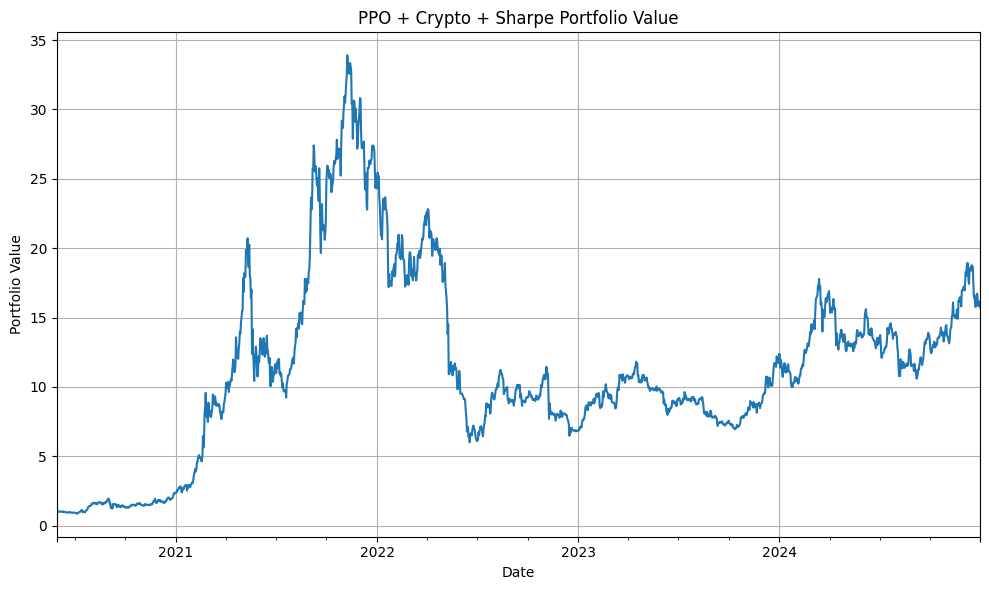

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# 시드 고정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산 설정
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    print(f"Fetching data for assets: {assets}")
    data = yf.download(assets, start=start, end=end)
    # Check if download was successful and contains 'Close' column
    if data.empty or 'Close' not in data.columns:
        raise ValueError(f"Could not fetch or find 'Close' data for assets: {assets}")

    price = data["Close"].dropna()
    if price.empty:
         raise ValueError(f"Price data is empty after dropping NaNs for assets: {assets}")
    print(f"Price data shape after dropna: {price.shape}")


    returns = price.pct_change().dropna()
    if returns.empty:
         raise ValueError(f"Returns data is empty after pct_change and dropping NaNs for assets: {assets}")
    print(f"Returns data shape after dropna: {returns.shape}")

    # Ensure momentum calculation uses the price data that was already cleaned
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()

    # Combine factors and drop rows with any NaN (due to rolling or pct_change)
    # Align indexes first
    factors = pd.concat([
        momentum.add_suffix("_mom"),
        volatility.add_suffix("_vol")
    ], axis=1)

    # Drop rows where any factor is NaN
    factors = factors.dropna()

    if factors.empty:
         raise ValueError(f"Factor data is empty after calculation and dropping NaNs for assets: {assets}")
    print(f"Factors data shape after dropna: {factors.shape}")


    # Ensure returns and price are aligned with the final factors index
    common_index = factors.index.intersection(returns.index).intersection(price.index)

    if len(common_index) < 31: # Need at least window_size + 1 data points
         raise ValueError(f"Not enough common data points ({len(common_index)}) for window size 30. Need at least 31.")

    price_aligned = price.loc[common_index]
    returns_aligned = returns.loc[common_index]
    factors_aligned = factors.loc[common_index]

    print(f"Aligned price shape: {price_aligned.shape}")
    print(f"Aligned returns shape: {returns_aligned.shape}")
    print(f"Aligned factors shape: {factors_aligned.shape}")


    return price_aligned, returns_aligned, factors_aligned

# 환경 클래스
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super(PPOPortfolioEnv, self).__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window # Start index for the current day's observation

        # Ensure there's enough data for the initial observation and at least one step
        if len(self.factors) <= self.window or len(self.price) <= self.window + 1:
             raise ValueError(f"Insufficient data for environment: need at least {self.window + 1} points.")

        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        # Observation space shape is (window_size, number_of_factors)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, self.factors.shape[1]), dtype=np.float32)
        self.objective = objective

    def reset(self):
        self.current = self.window # Reset to the start of the valid data period
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        # Return the first observation window
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)

        # Ensure we don't go out of bounds when accessing price_today and price_next
        if self.current >= len(self.price) - 1:
            # This should ideally be caught by the 'done' condition,
            # but adding a safeguard
            print("Warning: Step called near end of data.")
            done = True
            obs = self.factors.iloc[self.current - self.window:self.current].values # Return last valid obs
            reward = self._calculate_reward() # Calculate final reward
            info = {"portfolio_value": self.portfolio_value[-1]} # Use last known value
            return obs, reward, done, info


        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1 # Move to the next day

        # Done condition: when the next step would exceed the data length
        done = self.current + 1 >= len(self.price)

        # Ensure the observation window is valid
        obs_start = self.current - self.window
        obs_end = self.current
        if obs_start < 0 or obs_end > len(self.factors):
             # This indicates an issue with indexing, potentially related to
             # the done condition or data alignment.
             # For robustness, return a padded observation or handle as terminal state
             print(f"Error: Observation window out of bounds. Start: {obs_start}, End: {obs_end}, Factors len: {len(self.factors)}")
             # As a fallback, return the last valid observation window or handle as done
             done = True # Force done if observation is invalid
             obs = np.zeros_like(self.observation_space.sample()) # Return zero obs or last valid one
        else:
            obs = self.factors.iloc[obs_start:obs_end].values


        reward = self._calculate_reward() # Calculate reward based on objective

        return obs, reward, done, {"portfolio_value": port_value_next}

    def _calculate_reward(self):
        if self.objective == "sharpe":
            # Calculate Sharpe over the last 30 *steps* (which corresponds to days in this env)
            if len(self.portfolio_returns) < 2:
                return 0
            r = np.array(self.portfolio_returns[-30:])
            # Add small epsilon to std deviation to avoid division by zero
            std_dev = np.std(r)
            return np.mean(r) / (std_dev + 1e-6)
        # If objective is not 'sharpe', default to daily return reward
        else: # Could add other objectives here if needed
            if not self.portfolio_returns: # Handle case before any returns are recorded
                 return 0
            return self.portfolio_returns[-1]


# 훈련 및 평가 함수
def train_and_evaluate(price, returns, factors, objective="sharpe"):
    # Check if there's enough data before creating the environment
    window_size = 30
    if len(factors) <= window_size or len(price) <= window_size + 1:
        print(f"Warning: Not enough data ({len(factors)} points) for training/evaluation with window size {window_size}.")
        # Return empty series or handle appropriately
        return pd.Series([], dtype=float)


    def make_env():
        # Pass the potentially shorter, aligned dataframes to the environment
        return PPOPortfolioEnv(returns, factors, price, objective=objective)

    env = DummyVecEnv([make_env])

    # Check observation space shape after creating the environment
    expected_obs_shape = (window_size, factors.shape[1])
    actual_obs_shape = env.observation_space.shape
    if actual_obs_shape != expected_obs_shape:
        raise ValueError(f"Environment observation space shape mismatch: Expected {expected_obs_shape}, got {actual_obs_shape}")


    model = PPO("MlpPolicy", env, verbose=1, seed=SEED) # Set verbose to 1 for training output
    print(f"Starting training for objective: {objective}")
    # Train for fewer steps initially for quicker testing
    model.learn(total_timesteps=10000) # Reduce total_timesteps for faster debugging
    print("Training finished.")


    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    print("Starting evaluation...")
    # Evaluate for a reasonable number of steps, not necessarily the full length
    max_eval_steps = len(env_eval.price) - env_eval.window - 1
    steps_taken = 0
    while steps_taken < max_eval_steps:
        action, _ = model.predict(obs, deterministic=True) # Use deterministic policy for evaluation
        obs, reward, done, info = env_eval.step(action)
        values.append(info.get("portfolio_value", env_eval.portfolio_value[-1])) # Get value from info or last recorded
        steps_taken += 1
        if done:
            print(f"Evaluation finished after {steps_taken} steps.")
            break

    # Ensure the index length matches the number of recorded values
    # The index should start from the day *after* the initial window (day window+1)
    # and end at the day the last value was recorded.
    start_idx = env_eval.window + 1
    end_idx = start_idx + len(values)
    # Ensure indices are within bounds of the original price index
    if end_idx > len(price.index):
        end_idx = len(price.index)
        values = values[:end_idx - start_idx] # Trim values if needed

    index = price.index[start_idx:end_idx]


    if len(values) != len(index):
         print(f"Warning: Mismatch between number of values ({len(values)}) and index length ({len(index)}).")
         # Attempt to fix index length if mismatch occurs
         index = price.index[start_idx : start_idx + len(values)]
         if len(values) != len(index):
              print("Critical indexing error, returning empty series.")
              return pd.Series([], dtype=float) # Return empty if still mismatched


    print(f"Evaluation resulted in {len(values)} data points.")
    return pd.Series([1.0] + values, index=[price.index[env_eval.window]] + list(index)) # Include initial value for metrics


# 성과 측정 함수
def performance_metrics(series):
    if series.empty or len(series) < 2:
        print("Warning: Not enough data to calculate performance metrics.")
        return {
            "Cumulative Return": np.nan,
            "Annualized Return": np.nan,
            "Annualized Volatility": np.nan,
            "Sharpe Ratio": np.nan,
            "Max Drawdown": np.nan
        }

    returns = series.pct_change().dropna()
    # Calculate cumulative return from start to end
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1

    # Annualization factor is typically based on trading days (252 for stocks, could be different for crypto)
    # Using 252 as a common standard, but adjust if needed for crypto
    trading_days_year = 252
    total_days = (series.index[-1] - series.index[0]).days # Approx total days
    # Use number of available data points for annualization base if index is not purely daily
    if len(series) > 1:
         days_in_series = (series.index[-1] - series.index[0]).days
         if days_in_series > 0:
              annualization_base = 365.25 / (days_in_series / (len(series) - 1)) if len(series) > 1 else trading_days_year
         else: # Handle cases with very short series or same start/end date (shouldn't happen with dropna)
              annualization_base = trading_days_year
    else:
         annualization_base = trading_days_year # Default if calculation is not possible


    annualized_return = (1 + cumulative_return) ** (annualization_base / (len(series) - 1)) - 1 if len(series) > 1 else np.nan
    annualized_vol = returns.std() * np.sqrt(annualization_base) if len(returns) > 1 else np.nan

    # Sharpe ratio
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6) if annualized_vol is not np.nan else np.nan # Assume 0 risk-free rate

    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min() if not drawdown.empty else 0.0 # Max Drawdown

    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실행
try:
    price, returns, factors = fetch_data(crypto_assets)
    # Check if enough data exists before proceeding
    if len(factors) > 30 and len(price) > 31: # Need at least window + 1 days in price, window in factors
        result_series = train_and_evaluate(price, returns, factors, objective="sharpe")
        if not result_series.empty:
            metrics = performance_metrics(result_series)

            # 결과 출력
            print("\n📊 Performance Metrics:")
            for k, v in metrics.items():
                print(f"{k}: {v:.4f}")

            # 그래프 출력
            plt.figure(figsize=(10, 6))
            result_series.plot(title="PPO + Crypto + Sharpe Portfolio Value")
            plt.xlabel("Date")
            plt.ylabel("Portfolio Value")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
             print("Training/evaluation did not produce a valid results series.")

    else:
         print("Not enough data fetched or processed to run training/evaluation.")

except ValueError as e:
    print(f"Data processing error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

다음 6가지 실험을 한 번에 실행하고 결과를 비교

Crypto_PPO_sharpe

Crypto_PPO_beta

Crypto_SAC_sharpe

Crypto_SAC_beta

Crypto_TD3_sharpe

Crypto_TD3_beta

[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_PPO_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_PPO_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_SAC_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_SAC_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_TD3_sharpe



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
[*********************100%***********************]  4 of 4 completed

▶ Running: Crypto_TD3_beta



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                   Cumulative Return  Annualized Return  \
Crypto_PPO_sharpe          35.323142           0.716825   
Crypto_PPO_beta           433.641966           1.494026   
Crypto_SAC_sharpe          79.397263           0.934814   
Crypto_SAC_beta          3016.370144           2.338123   
Crypto_TD3_sharpe          34.508813           0.710979   
Crypto_TD3_beta          2336.170692           2.212269   

                   Annualized Volatility  Sharpe Ratio  Max Drawdown  
Crypto_PPO_sharpe               0.660536      1.085216     -0.811495  
Crypto_PPO_beta                 0.769496      1.941563     -0.818936  
Crypto_SAC_sharpe               0.629353      1.485356     -0.771070  
Crypto_SAC_beta                 0.864844      2.703518     -0.752429  
Crypto_TD3_sharpe               0.660293      1.076761     -0.798907  
Crypto_TD3_beta                 0.838151      2.639460     -0.741781  


<ipython-input-10-edd48594314d>:115: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-10-edd48594314d>:116: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1


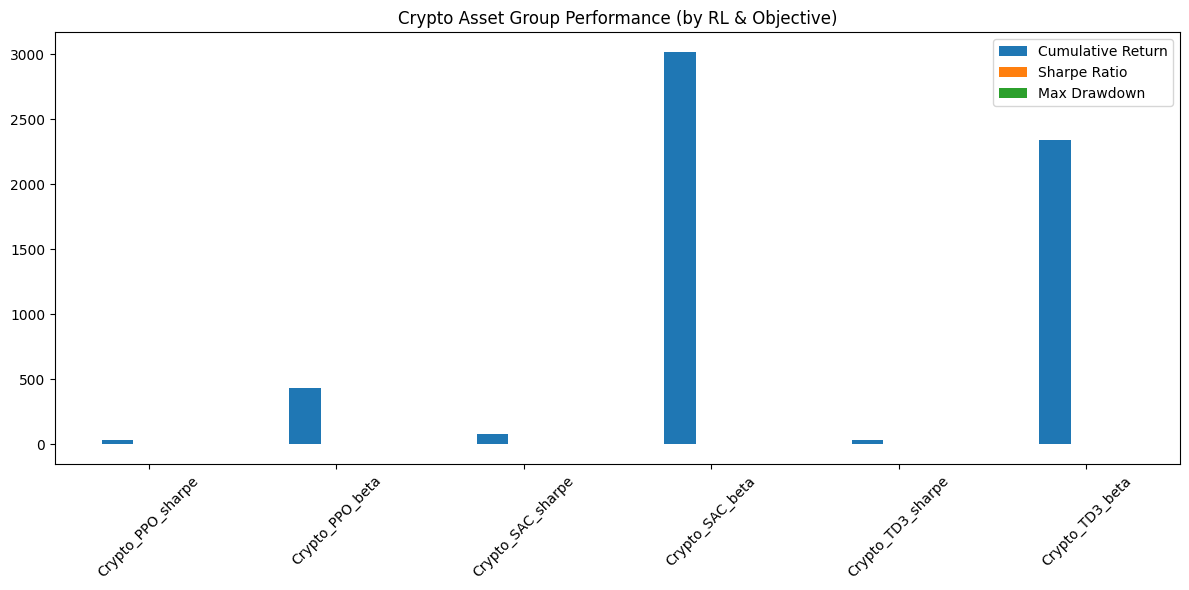

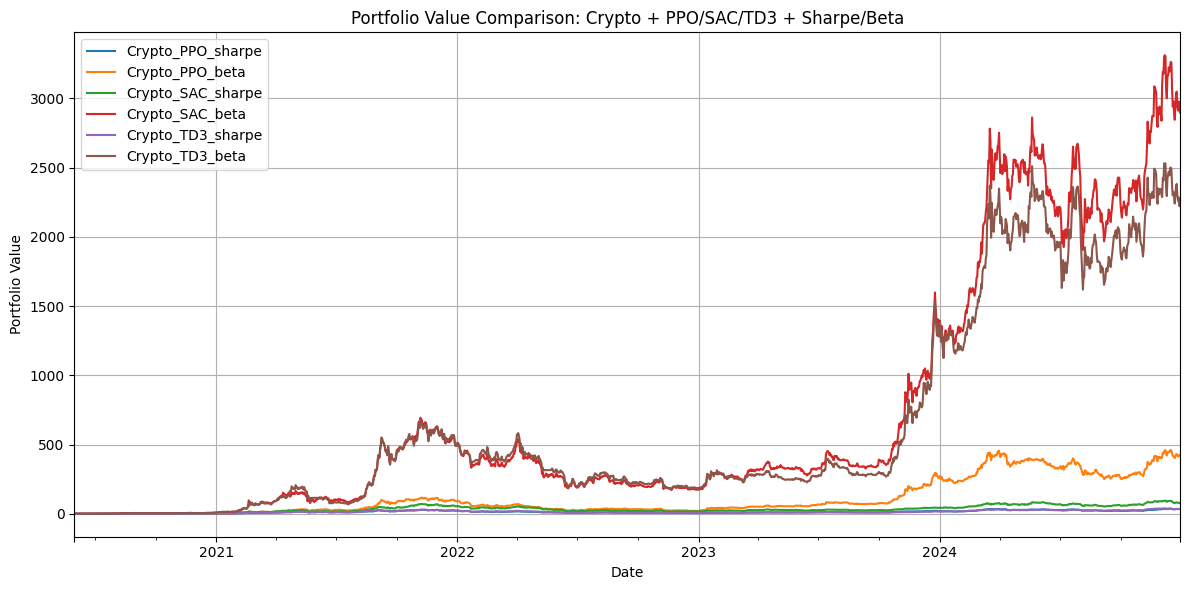

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# Seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Asset Group
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]

# Data
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# Environment
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)
        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return
        return obs, reward, done, {"portfolio_value": port_value_next}

# Training & Evaluation
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가 시뮬레이션
    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실험 실행
experiments = [
    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
    ("Crypto", crypto_assets, "TD3", TD3, "beta")
]

results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)

# 성과 테이블 생성
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대 그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Max Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Crypto Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 통합 시계열 그래프
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Crypto + PPO/SAC/TD3 + Sharpe/Beta")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Stock_PPO_sharpe

Stock_PPO_beta

Stock_SAC_sharpe

Stock_SAC_beta

Stock_TD3_sharpe

Stock_TD3_beta

In [ ]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random

# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]

# 데이터 수집 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)["Close"]
    price = data.dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# 강화학습 환경
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)
        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets]].values
            reward = np.dot(action, beta_score)
        else:
            reward = port_return
        return obs, reward, done, {"portfolio_value": port_value_next}

# 훈련 및 평가 함수
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PPOPortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    # 평가
    env_eval = make_env()
    obs = env_eval.reset()
    values = []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        if done:
            break
    index = price.index[31:31+len(values)]
    return pd.Series(values, index=index)

# 성과지표 계산 함수
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (annualized_return - 0.0) / (annualized_vol + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    return {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe,
        "Max Drawdown": mdd
    }

# 실험 구성
experiments = [
    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
    ("Stock", stock_assets, "PPO", PPO, "beta"),
    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
    ("Stock", stock_assets, "SAC", SAC, "beta"),
    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
    ("Stock", stock_assets, "TD3", TD3, "beta")
]

# 실험 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)

# 성과 요약
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Max Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Stock Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프 (겹침)
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Stock + PPO/SAC/TD3 + Sharpe/Beta")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


# 전체 혼합 자산 기반 강화학습 포트폴리오 최적화 코드 (Sharpe, Beta, Hybrid 보상 포함)

[******************    38%                       ]  3 of 8 completed

▶ Running: Mixed_PPO_sharpe


[*********************100%***********************]  8 of 8 completed
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
<ipython-input-9-f5245b5a6772>:134: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, shap_df, plot_type="bar")


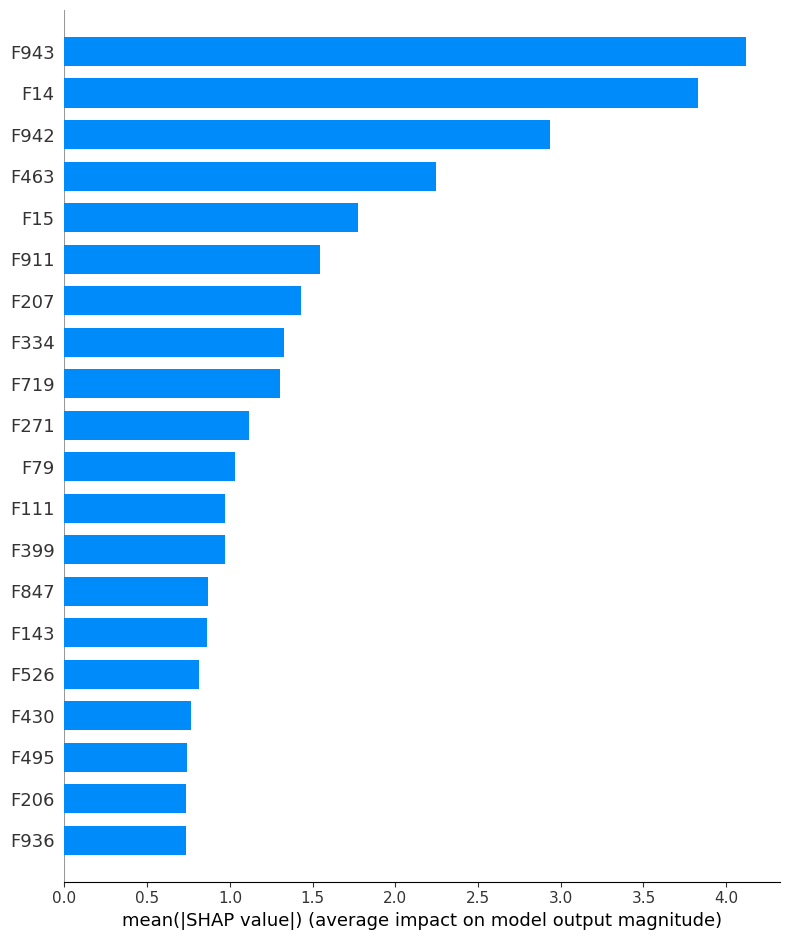

평균 Action (예시): [0.094511   0.21854658 0.10063753 0.01360888 0.3823849  0.04165003
 0.11021609 0.4695563 ]


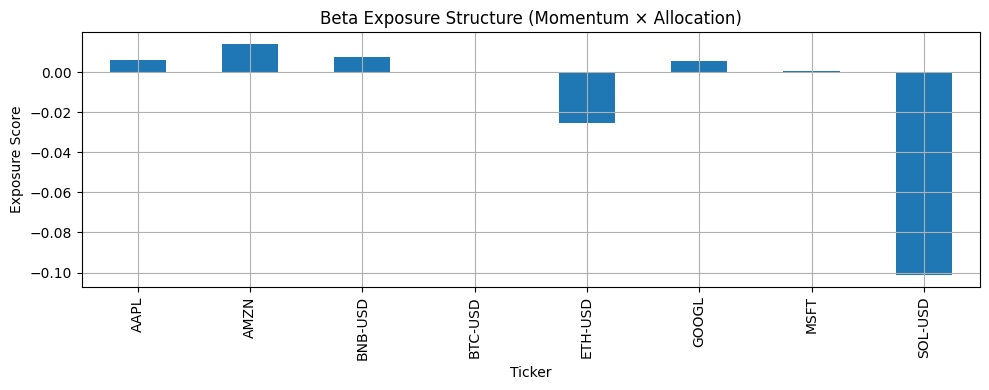

<ipython-input-9-f5245b5a6772>:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = series[-1] / series[0] - 1
<ipython-input-9-f5245b5a6772>:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
<ipython-input-9-f5245b5a6772>:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1


                  Sharpe Ratio  Sortino Ratio  Cumulative Return  \
Mixed_PPO_sharpe      3.770484       6.126224         130.002112   

                  Annualized Return  Annualized Volatility      CAGR  \
Mixed_PPO_sharpe           1.971727               0.522937  1.971727   

                  Maximum Drawdown  Turnover Ratio  
Mixed_PPO_sharpe         -0.514163        0.022759  


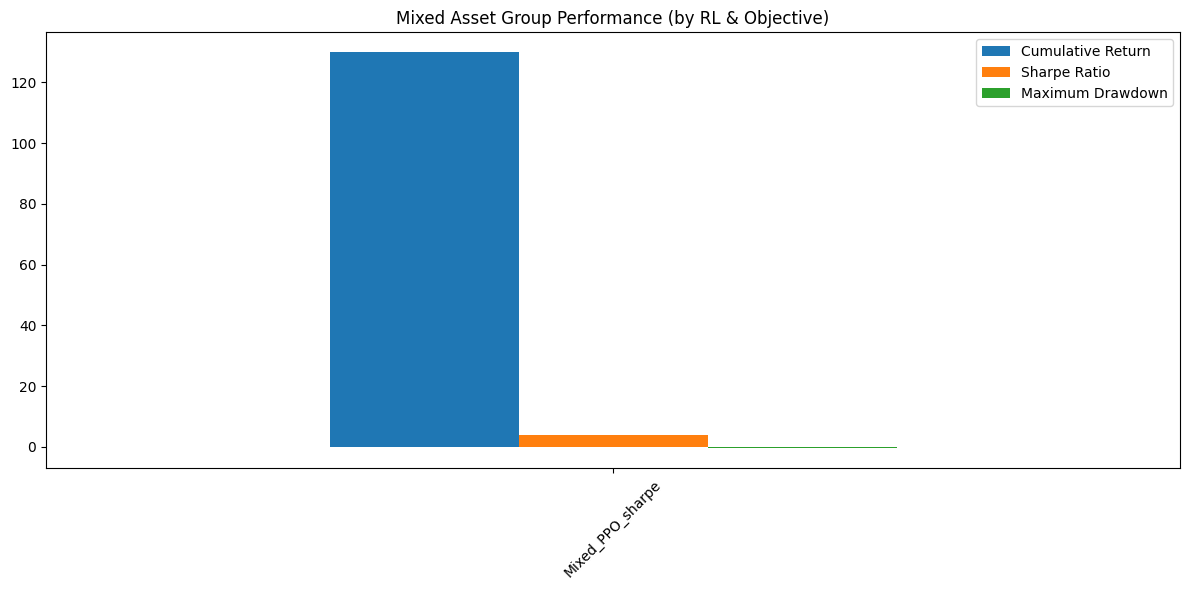

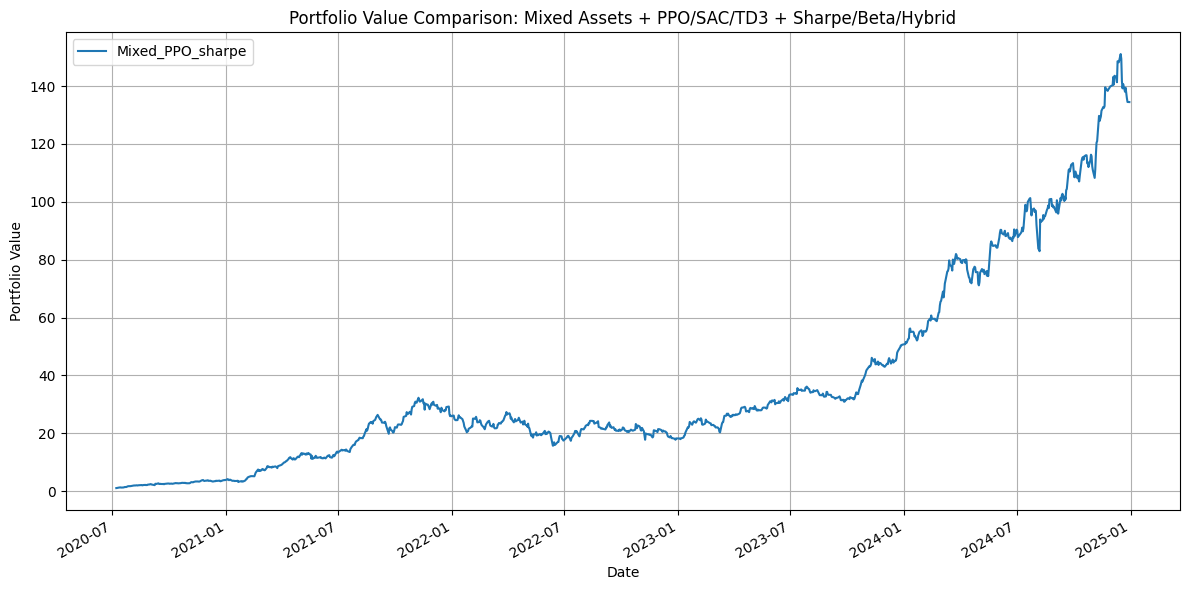

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import gym
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.ensemble import GradientBoostingRegressor
import shap
import torch, random, gc

# Seed
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# 혼합 자산군
mixed_assets = ["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

# 데이터 함수
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    data = yf.download(assets, start=start, end=end)
    price = data["Close"].dropna()
    volume = data["Volume"].dropna()
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20)
    volatility = returns.rolling(20).std()
    ma_deviation = (price - price.rolling(20).mean()) / price.rolling(20).mean()
    volume_zscore = (volume - volume.rolling(30).mean()) / volume.rolling(30).std()
    factors = pd.concat([
        momentum.add_suffix("_mom"),
        volatility.add_suffix("_vol"),
        ma_deviation.add_suffix("_ma"),
        volume_zscore.add_suffix("_volz")
    ], axis=1).dropna()
    idx = returns.index.intersection(factors.index)
    return price.loc[idx], returns.loc[idx], factors.loc[idx]

# 환경 정의
class PortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 30
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.window, factors.shape[1]), dtype=np.float32)

    def reset(self):
        self.current = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current - self.window:self.current].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action /= (np.sum(action) + 1e-8)
        price_today = self.price.iloc[self.current].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value
        cost = np.sum(np.abs(trade_value) * 0.001)
        self.cash -= cost
        self.asset_quantity += trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today)

        price_next = self.price.iloc[self.current + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - self.portfolio_value[-1]) / self.portfolio_value[-1]
        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current += 1
        done = self.current + 1 >= len(self.returns)
        obs = self.factors.iloc[self.current - self.window:self.current].values

        # 보상함수
        if self.objective == "sharpe":
            r = np.array(self.portfolio_returns[-30:])
            reward = np.mean(r) / (np.std(r) + 1e-6)
        elif self.objective == "beta":
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            reward = np.dot(action, beta_score)
        elif self.objective == "hybrid":
            r = np.array(self.portfolio_returns[-30:])
            sharpe = np.mean(r) / (np.std(r) + 1e-6)
            beta_score = self.factors.iloc[self.current - 1][[a + "_mom" for a in self.assets if a + "_mom" in self.factors.columns]].values
            beta = np.dot(action, beta_score)
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

# 학습 및 평가
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)
    def make_env():
        return PortfolioEnv(returns, factors, price, objective)
    env = DummyVecEnv([make_env])
    model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
    model.learn(total_timesteps=50000)

    env_eval = make_env()
    obs = env_eval.reset()
    values, states = [], []
    while True:
        action, _ = model.predict(obs)
        obs, reward, done, info = env_eval.step(action)
        values.append(info["portfolio_value"])
        states.append(obs.flatten())
        if done:
            break
    index = price.index[31:31+len(values)]

    # SHAP 해석용 데이터
    shap_df = pd.DataFrame(states, columns=[f"F{i}" for i in range(len(states[0]))])
    gbm = GradientBoostingRegressor().fit(shap_df, values)
    explainer = shap.Explainer(gbm)
    shap_values = explainer(shap_df)
    shap.summary_plot(shap_values, shap_df, plot_type="bar")

    # 베타 유사 구조 시각화
    states = [env_eval.reset()]
    for _ in range(10):
        action, _ = model.predict(states[-1], deterministic=True)
        obs, _, done, _ = env_eval.step(action)
        if done:
            break
        states.append(obs)

    avg_actions = np.mean([model.predict(s, deterministic=True)[0] for s in states], axis=0)
    print("평균 Action (예시):", avg_actions)

    #avg_actions = np.mean([model.predict(s.reshape(1, *s.shape))[0] for s in states], axis=0)
    latest_factors = factors.iloc[-1][[a + "_mom" for a in price.columns if a in price.columns]]
    beta_exposure = pd.Series(avg_actions, index=price.columns[:len(avg_actions)]) * latest_factors.values
    beta_exposure.plot(kind="bar", title="Beta Exposure Structure (Momentum × Allocation)", figsize=(10, 4))
    plt.ylabel("Exposure Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 정리 및 리소스 해제
    del model
    gc.collect()

    return pd.Series(values, index=index)

# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series[-1] / series[0] - 1
    annualized_return = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    cagr = (series[-1] / series[0]) ** (252 / len(series)) - 1
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    turnover = (np.abs(returns).sum()) / len(returns)
    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }



# 실험 목록
experiments = [
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
]

# 실행
results = {}
for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    results[key] = train_and_evaluate(assets, algo_class, objective)


# 성과 요약
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Mixed Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 결과 시각화
results_df = pd.DataFrame(results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison: Mixed Assets + PPO/SAC/TD3 + Sharpe/Beta/Hybrid")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()
